# 随机森林处理求职推荐

In [1]:
# 导入所需库
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#导入数据
data = pd.read_csv('data/爆炸.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   senior      2228 non-null   int64 
 1   y_salary    2228 non-null   int64 
 2   edu         2228 non-null   int64 
 3   exp         2228 non-null   object
 4   size        2228 non-null   object
 5   stack       2228 non-null   int64 
 6   binsurance  2228 non-null   int64 
 7   minsurance  2228 non-null   int64 
 8   paleave     2228 non-null   int64 
 9   fpe         2228 non-null   int64 
 10  ebenefit    2228 non-null   int64 
 11  cclass      2228 non-null   int64 
 12  internet    2228 non-null   int64 
 13  jclass      2228 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 243.8+ KB


In [3]:
data.columns

Index(['senior', 'y_salary', 'edu', 'exp', 'size', 'stack', 'binsurance',
       'minsurance', 'paleave', 'fpe', 'ebenefit', 'cclass', 'internet',
       'jclass'],
      dtype='object')

In [4]:
data.head()

,senior,y_salary,edu,exp,size,stack,binsurance,minsurance,paleave,fpe,ebenefit,cclass,internet,jclass
0,1,56,1,0到1,20-99人,0,0,0,0,0,0,1,1,6
1,1,222,2,1到3,100-499人,0,1,0,1,1,5,1,0,2
2,1,68,1,0到1,10000人以上,0,1,0,1,1,7,4,1,5
3,1,132,3,0到1,100-499人,1,1,1,1,1,5,2,1,6
4,1,129,1,1到3,20-99人,0,1,0,1,1,8,1,1,3


In [5]:
# 数据预处理

# 唯一的连续变量
# ebenefit

# 分类变量列表
data['size'] = data['size'].apply(str)
data['jclass'] = data['jclass'].apply(str)
data['edu'] = data['edu'].apply(str)
data['exp'] = data['exp'].apply(str)
data['cclass']= data['cclass'].apply(str)

# 虚拟变量列表
data['senior'] = data['senior'].apply(str)
data['stack'] = data['stack'].apply(str)
data['binsurance'] = data['binsurance'].apply(str)
data['minsurance'] = data['minsurance'].apply(str)
data['paleave'] = data['paleave'].apply(str)
data['fpe'] = data['fpe'].apply(str)
data['internet'] = data['internet'].apply(str)

In [6]:
data=data.dropna()

In [7]:
data.describe()

,y_salary,ebenefit
count,2228.000000,2228.000000
mean,167.723070,4.469479
std,130.817982,2.954294
min,40.000000,0.000000
25%,80.000000,2.000000
50%,126.000000,5.000000
75%,209.000000,7.000000
max,707.000000,10.000000


In [8]:
data.head()

,senior,y_salary,edu,exp,size,stack,binsurance,minsurance,paleave,fpe,ebenefit,cclass,internet,jclass
0,1,56,1,0到1,20-99人,0,0,0,0,0,0,1,1,6
1,1,222,2,1到3,100-499人,0,1,0,1,1,5,1,0,2
2,1,68,1,0到1,10000人以上,0,1,0,1,1,7,4,1,5
3,1,132,3,0到1,100-499人,1,1,1,1,1,5,2,1,6
4,1,129,1,1到3,20-99人,0,1,0,1,1,8,1,1,3


# 探索性分析

array([[<AxesSubplot:title={'center':'y_salary'}>,
        <AxesSubplot:title={'center':'ebenefit'}>]], dtype=object)

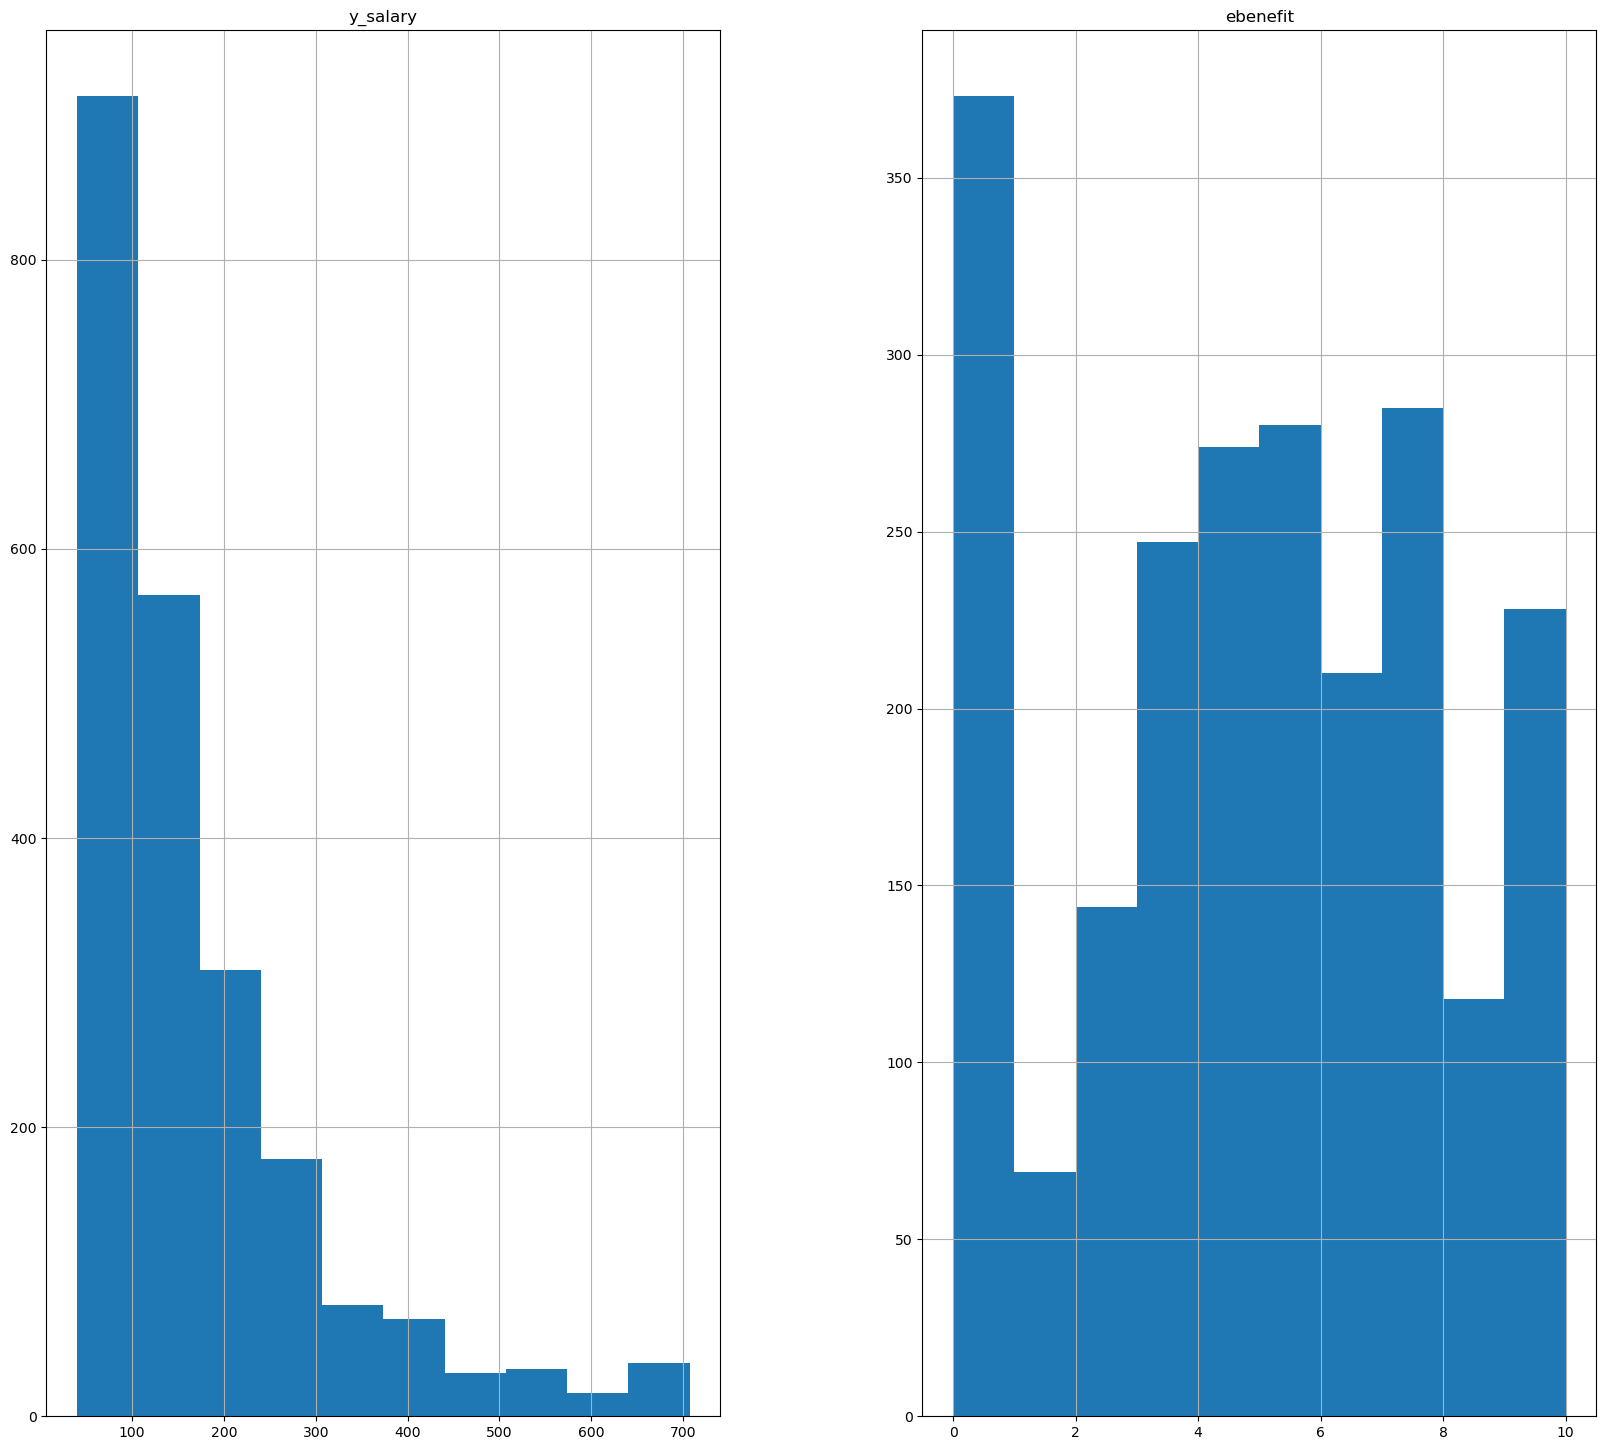

In [9]:
# 绘制直方图
%matplotlib inline
data.hist(figsize = (20, 18))

<AxesSubplot:xlabel='y_salary', ylabel='senior'>

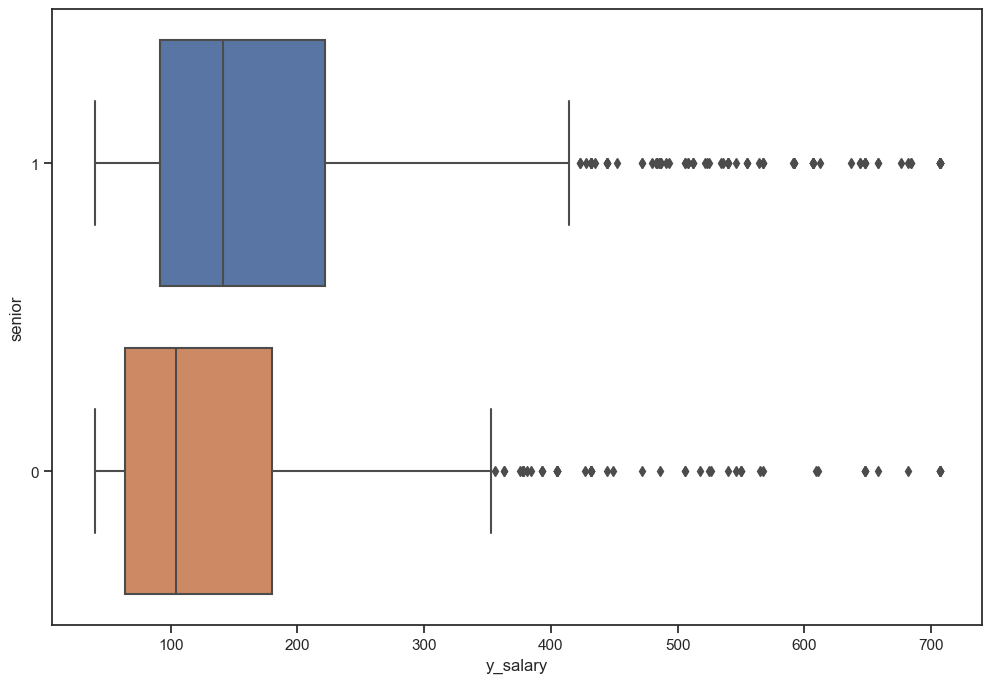

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "senior", data = data) 

<AxesSubplot:xlabel='y_salary', ylabel='stack'>

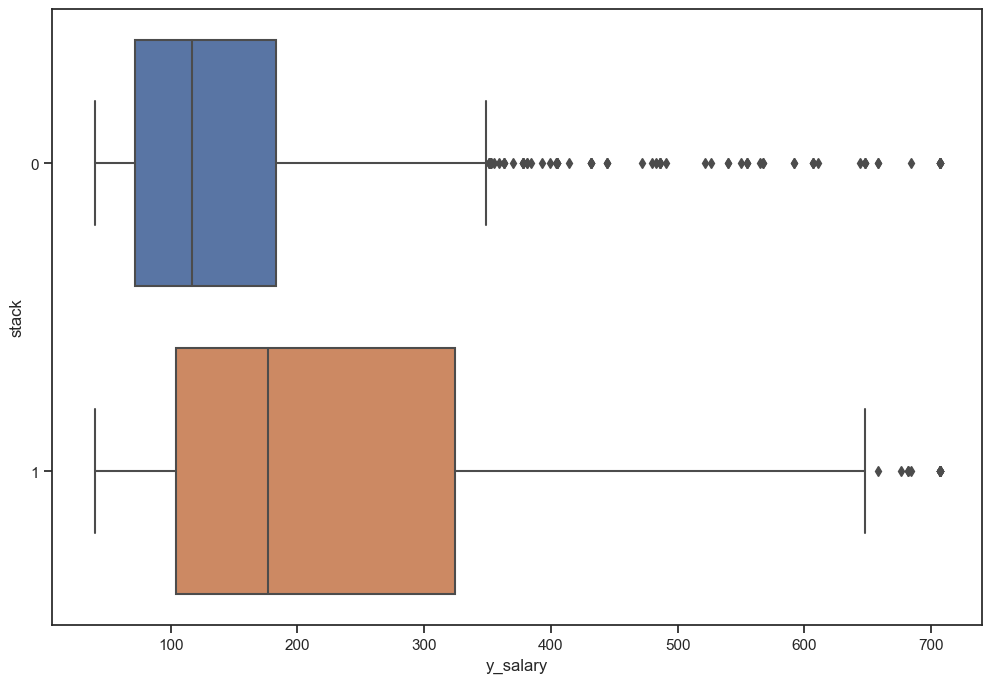

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "stack", data = data) 

<AxesSubplot:xlabel='y_salary', ylabel='binsurance'>

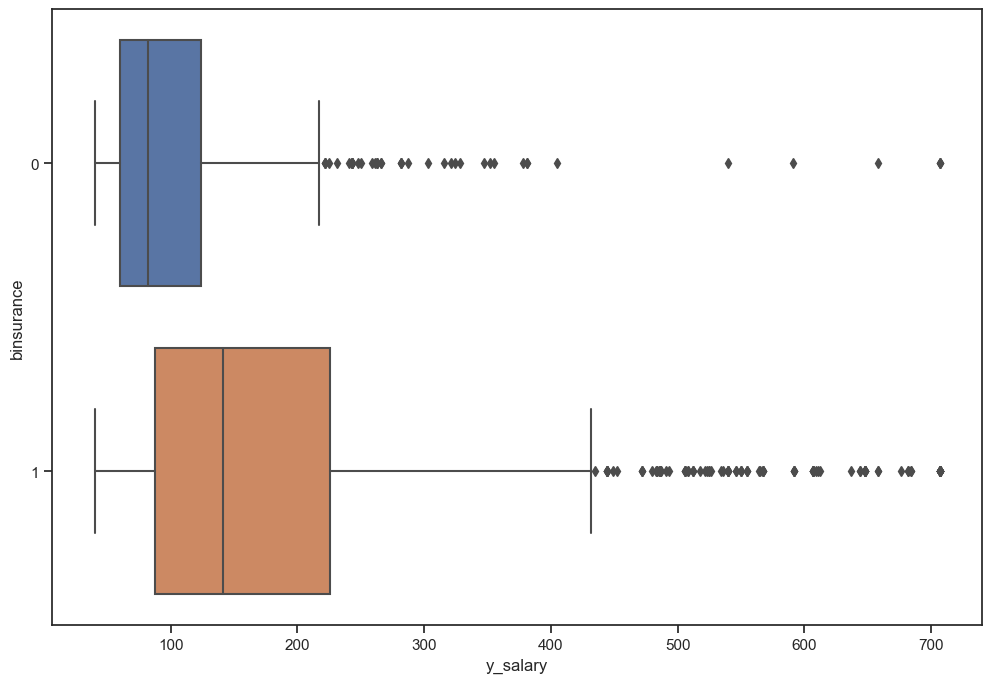

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "binsurance", data = data) 

<AxesSubplot:xlabel='y_salary', ylabel='minsurance'>

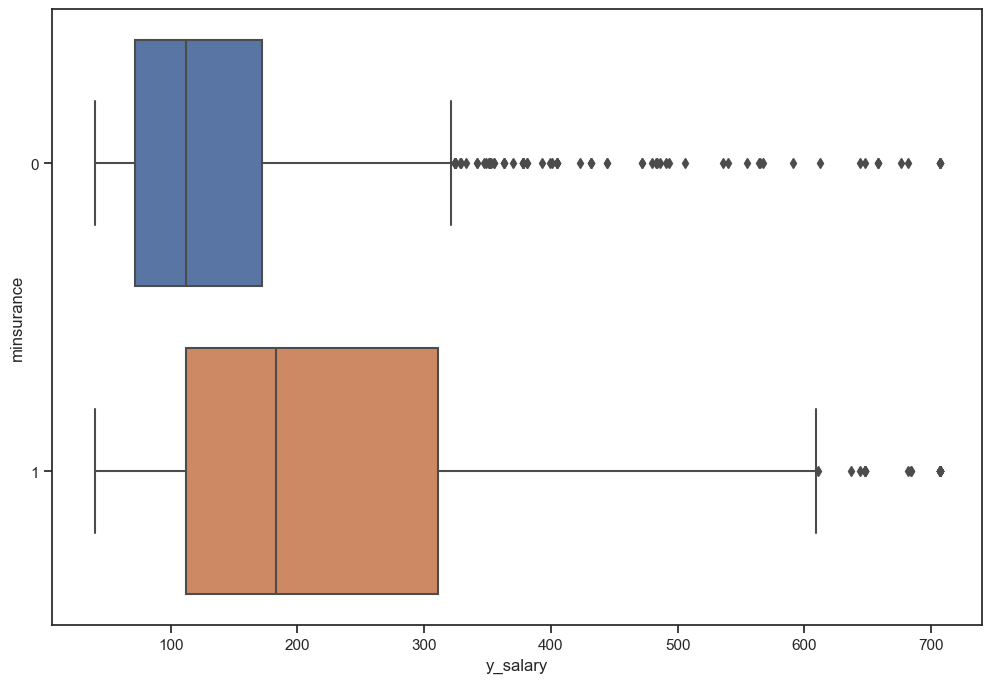

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "minsurance", data = data) 

<AxesSubplot:xlabel='y_salary', ylabel='paleave'>

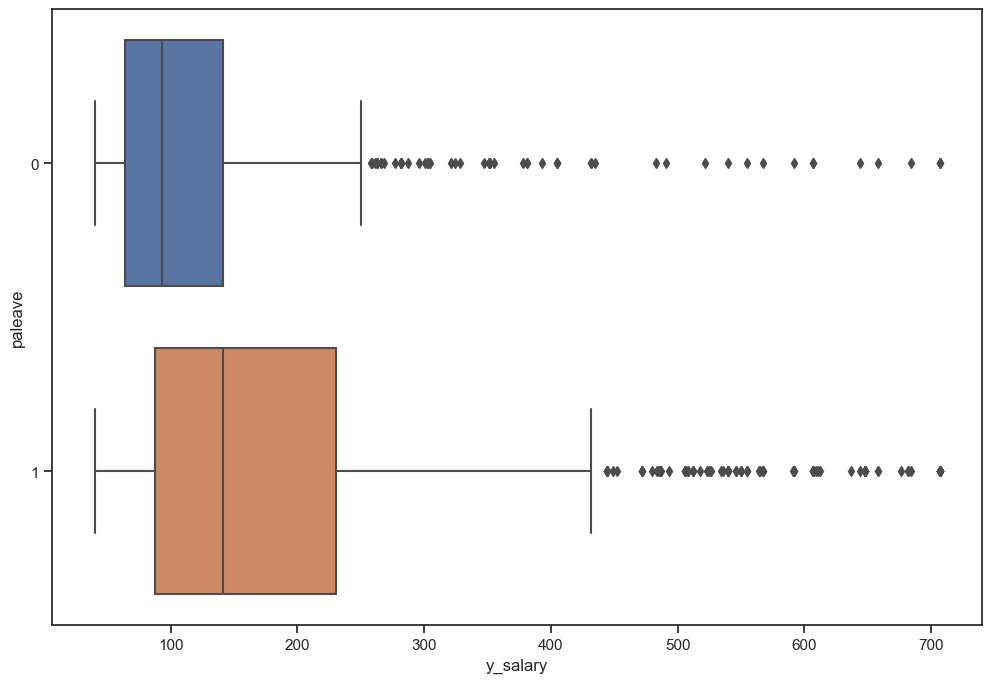

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "paleave", data = data) 

<AxesSubplot:xlabel='y_salary', ylabel='fpe'>

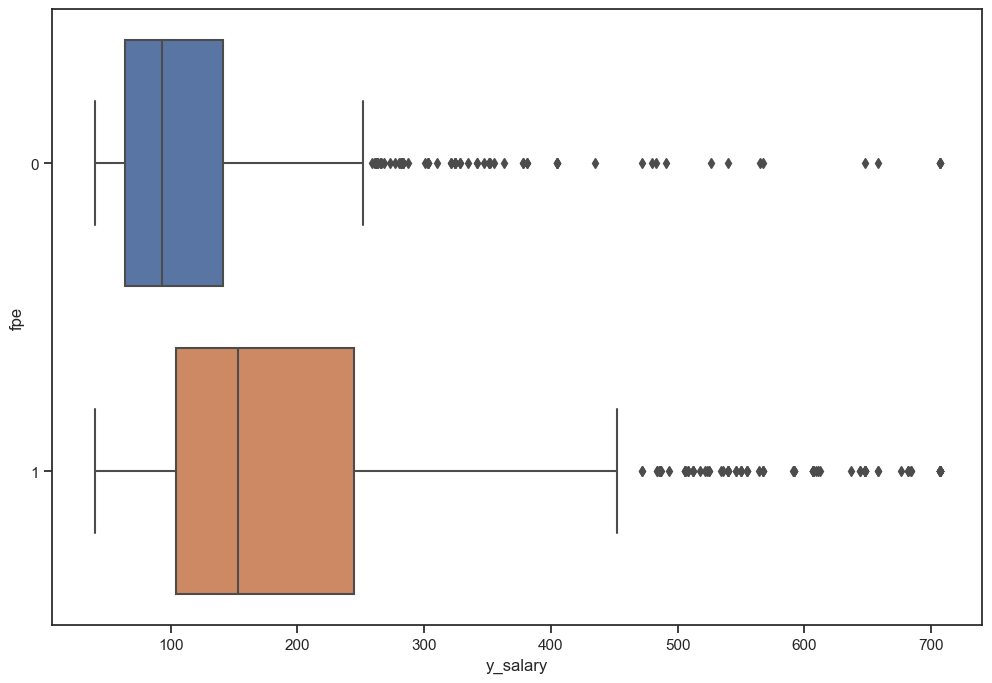

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "fpe", data = data) 

<AxesSubplot:xlabel='y_salary', ylabel='internet'>

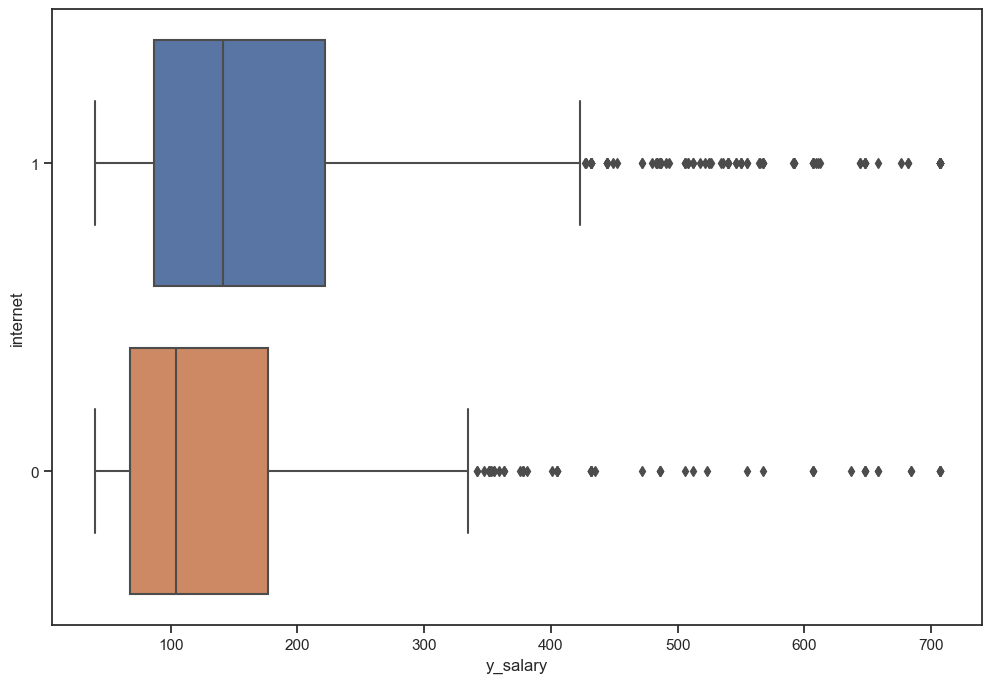

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "internet", data = data) 

<AxesSubplot:xlabel='y_salary', ylabel='jclass'>

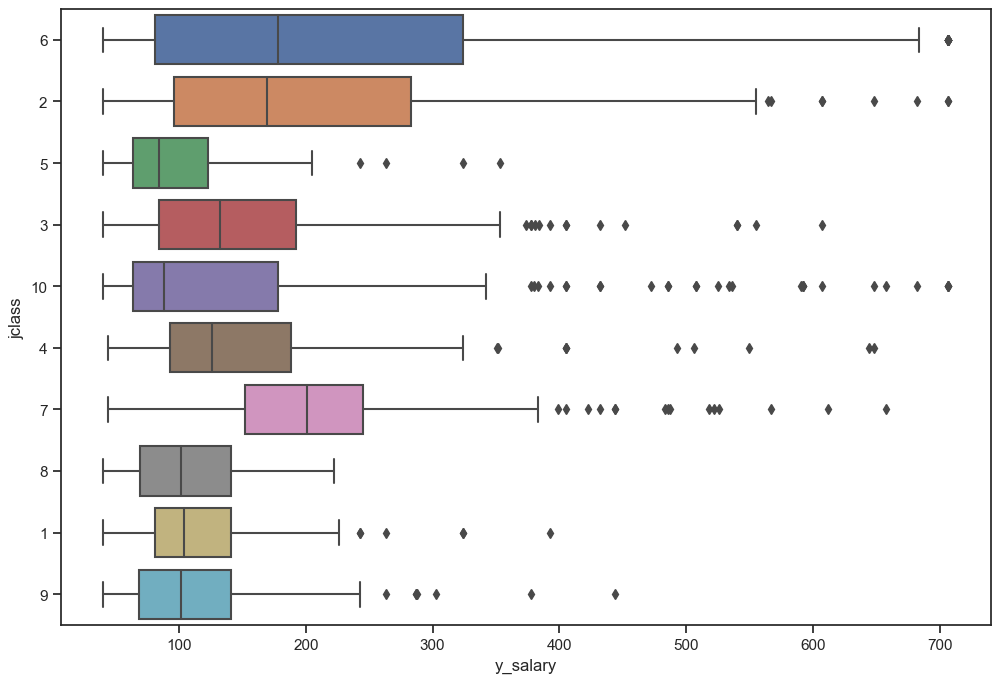

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "y_salary", y = "jclass", data = data) 

# 生成训练集

In [18]:
data['y_salary_log'] = data['y_salary'].apply(np.log)
y = data['y_salary_log']# 设置y值，把工资作为连续变量取对数作为y值

In [19]:
features = ["size","edu","exp", "cclass", "ebenefit","senior","stack","binsurance","minsurance","paleave","fpe", "internet","jclass"]

X = data[features] # 提取特征列

X = pd.get_dummies(X, columns=features, drop_first = True)  # 处理分类变量，转换成虚拟变量

X.head()  # 查看前几行数据
X.describe()

,size_100-499人,size_1000-9999人,size_10000人以上,size_20-99人,size_500-999人,edu_1,edu_2,edu_3,exp_1到3,exp_3到5,...,internet_1,jclass_10,jclass_2,jclass_3,jclass_4,jclass_5,jclass_6,jclass_7,jclass_8,jclass_9
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,...,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,0.202873,0.171903,0.228905,0.218133,0.060592,0.450180,0.355027,0.072711,0.269300,0.188959,...,0.673698,0.122980,0.127917,0.067774,0.118043,0.080341,0.171903,0.093806,0.071813,0.082585
std,0.402229,0.377381,0.420222,0.413071,0.238635,0.497623,0.478629,0.259720,0.443696,0.391564,...,0.468964,0.328488,0.334073,0.251414,0.322732,0.271882,0.377381,0.291624,0.258236,0.275316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#构建训练集、测试集,20%为测试集，80%为训练集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 加载随机森林进行训练，用于对工资回归

In [21]:
# 导入随机森林回归模型
from sklearn.ensemble import RandomForestRegressor

In [22]:
# 创建随机森林回归对象
rf = RandomForestRegressorrf = RandomForestRegressor(n_estimators=100, oob_score = True, max_features='auto', random_state =0)

# 训练模型
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [23]:
from sklearn.ensemble import RandomForestRegressor

## 定义随机森林分类模型
model = RandomForestRegressor(n_estimators=100 , oob_score = True, 
                                  random_state =50)

# 评价模型

In [24]:
# 评估模型
from sklearn.metrics import mean_squared_error, r2_score
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('oob_score',rf.oob_score_)#袋外分类正确率（OOB）

Mean Squared Error: 0.17181213027959297
R-squared: 0.6340230867978549
oob_score 0.6339534038873127


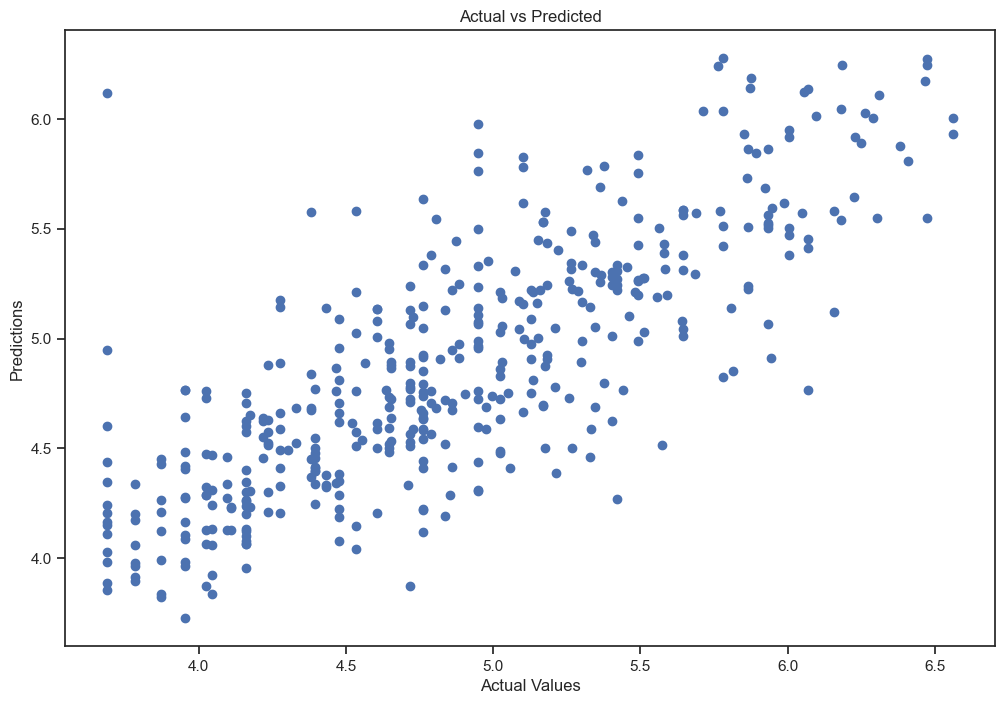

In [25]:
# 可视化实际值与预测值的对比
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted')
plt.show()

In [26]:
# 使用模型对新数据进行预测
# 假设new_data是待预测的新数据集，用X_test来演示
new_data = X_test
predictions = rf.predict(new_data)
print(predictions)

[3.96233862 4.51954324 4.28801266 5.07711623 4.58850093 4.54924413
 5.19968221 4.541875   4.76793938 4.62507643 4.62908719 6.14022715
 4.27438916 4.76793938 4.52345618 4.89497753 4.3237863  4.15327173
 4.87811852 4.33699001 4.90826718 5.31350677 5.1390101  4.62313868
 4.61772862 4.53769025 5.14641434 5.0299148  4.20615932 5.87859288
 5.68705059 4.42963905 5.38173919 4.76241701 5.09759771 5.57702142
 5.76366803 4.12748    4.66333845 4.70823997 5.31772257 4.28950237
 4.25929716 4.631724   5.27471946 4.68689417 4.91770788 5.28777431
 5.84403297 4.47537952 4.34335632 4.94802476 3.99359618 4.65000441
 4.8886095  5.21858039 4.83047653 5.30666465 4.73056772 6.04615555
 4.57402498 4.75122881 4.17235389 6.23960406 5.54380387 4.43783696
 5.23969206 5.22426327 5.64629746 5.13194449 3.87461714 4.45210875
 4.40033411 5.4895351  4.37715799 5.13925673 4.99775927 4.87499364
 4.56582928 4.08578873 5.34520411 5.21287156 4.72489805 4.67664537
 6.24707924 5.89302644 5.06719565 5.07811774 3.92201533 4.9114

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


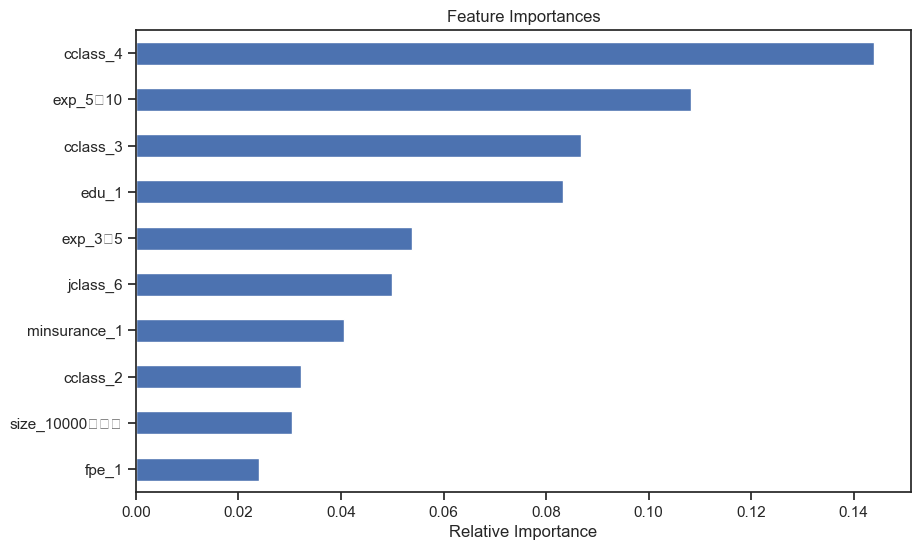

In [27]:
importances = rf.feature_importances_#做特征的重要性
weights = pd.Series(importances,
                 index=X.columns.values)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
weights.sort_values()[-10:].plot(kind = 'barh')#[-10:]表示这么多特征中只想看前十重要的特征
plt.xlabel('Relative Importance')
plt.show()

In [28]:
weights.sort_values(ascending = False) ## 从大到小排序重要性

cclass_4           0.143985
exp_5到10           0.108370
cclass_3           0.086909
edu_1              0.083406
exp_3到5            0.053757
jclass_6           0.049890
minsurance_1       0.040643
cclass_2           0.032163
size_10000人以上      0.030414
fpe_1              0.024065
edu_3              0.023383
senior_1           0.022381
stack_1            0.021402
internet_1         0.020519
exp_1到3            0.016464
edu_2              0.014544
ebenefit_3         0.014490
size_20-99人        0.013717
jclass_7           0.012765
jclass_8           0.012545
paleave_1          0.012251
ebenefit_5         0.011620
size_1000-9999人    0.011498
binsurance_1       0.011183
ebenefit_7         0.010792
jclass_10          0.010299
ebenefit_4         0.009824
jclass_2           0.009664
jclass_9           0.009570
size_100-499人      0.009557
jclass_4           0.009267
jclass_5           0.009084
ebenefit_6         0.008058
ebenefit_8         0.007618
size_500-999人      0.007312
ebenefit_2         0

# 使用交叉验证和网格搜索法 GridSearchCV进行调参数

In [29]:
# 导入网格搜索所需的库
from sklearn.model_selection import GridSearchCV

In [30]:
# 进行网格搜索参数设置
param_grid = {
    'n_estimators': [50, 100, 200, 300, 350],
    'max_depth' : [12, 15, 20, 22, 24, 26],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
}

In [31]:
# 创建随机森林回归对象
rf = RandomForestRegressor(random_state=0, oob_score = True)

In [32]:
# 创建GridSearchCV对象，这里指定交叉验证的折数为5折
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [33]:
# 训练模型
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [12, 15, 20, 22, 24, 26],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200, 300, 350]},
             scoring='neg_mean_squared_error')

In [34]:
# 获取最佳参数组合
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'ccp_alpha': 0.0, 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 300}


In [35]:
# 使用最佳参数重新训练模型
best_rf = RandomForestRegressor(**best_params, random_state=0,  oob_score = True)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, n_estimators=300,
                      oob_score=True, random_state=0)

In [36]:
# 评估模型
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print('Mean Squared Error with best parameters:', mse_best)
print('R-squared with best parameters:', r2_best)
print('oob_score with best parameters',best_rf.oob_score_)#袋外分类正确率（OOB）

Mean Squared Error with best parameters: 0.1712391754305868
R-squared with best parameters: 0.6352435375698827
oob_score with best parameters 0.6499294429519101


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


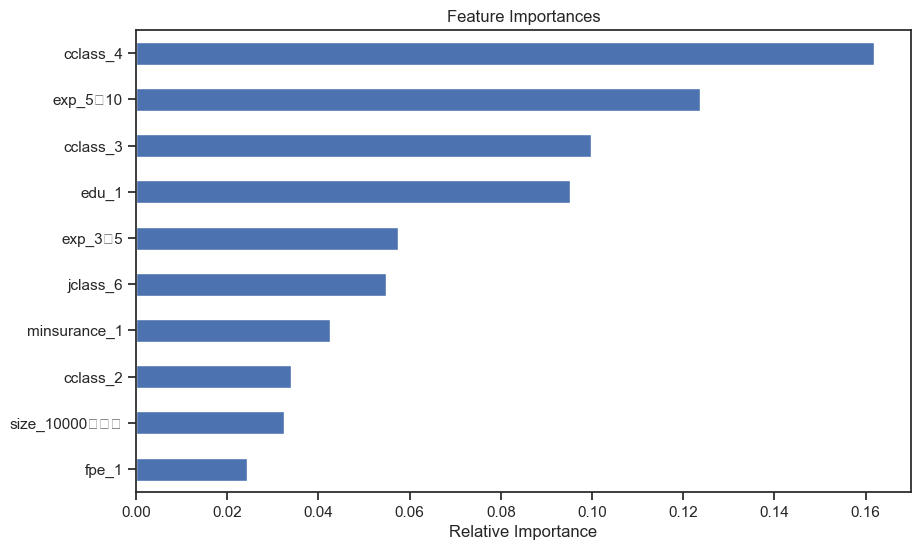

In [37]:
importances = best_rf.feature_importances_#做特征的重要性
weights = pd.Series(importances,
                 index=X.columns.values)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
weights.sort_values()[-10:].plot(kind = 'barh')#[-10:]表示这么多特征中只想看前十重要的特征
plt.xlabel('Relative Importance')
plt.show()

In [38]:
weights.sort_values(ascending = False) ## 从大到小排序重要性

cclass_4           0.161837
exp_5到10           0.123779
cclass_3           0.099696
edu_1              0.095228
exp_3到5            0.057413
jclass_6           0.054924
minsurance_1       0.042518
cclass_2           0.033913
size_10000人以上      0.032409
fpe_1              0.024294
stack_1            0.022324
senior_1           0.020798
edu_3              0.020620
internet_1         0.018819
exp_1到3            0.014281
jclass_7           0.013889
edu_2              0.013156
ebenefit_3         0.011485
size_20-99人        0.010753
size_1000-9999人    0.010277
paleave_1          0.009733
jclass_8           0.009283
binsurance_1       0.008043
jclass_10          0.007965
jclass_2           0.007795
ebenefit_7         0.007574
jclass_5           0.007534
size_100-499人      0.007388
jclass_4           0.006969
ebenefit_5         0.006462
ebenefit_4         0.006177
jclass_9           0.005834
size_500-999人      0.005057
ebenefit_6         0.004324
ebenefit_10        0.003468
ebenefit_8         0

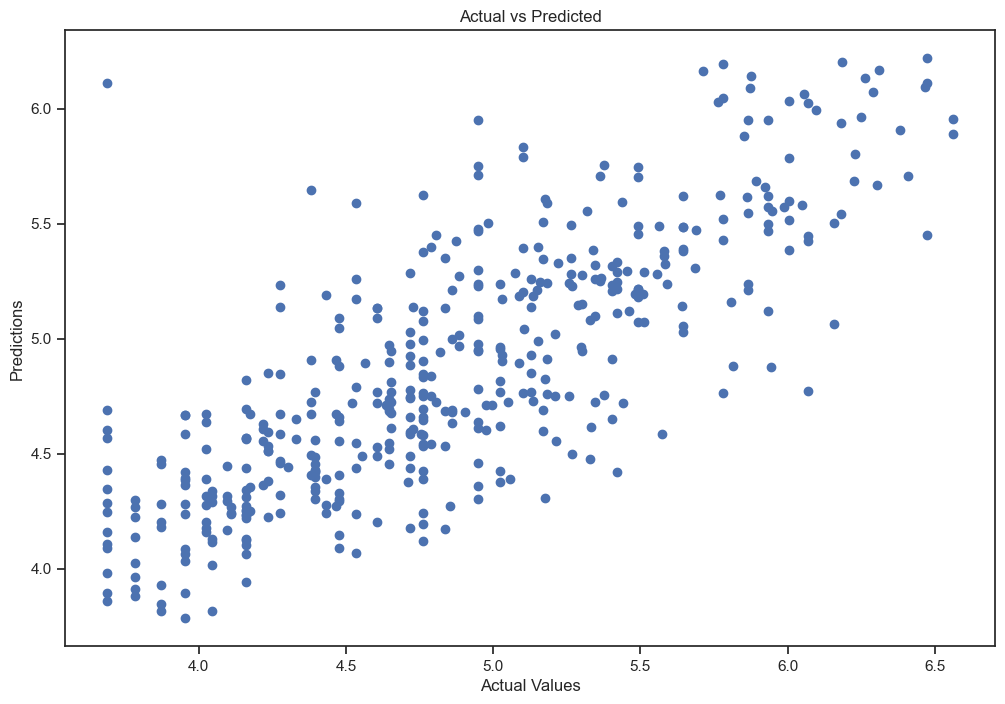

In [39]:
# 可视化实际值与预测值的对比
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted')
plt.show()

改进后的回归工资的模型，回归出来的结果为：   
现在的Best parameters found:  {'ccp_alpha': 0.0, 'max_depth': 22, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 100}
Mean Squared Error with best parameters: 0.1447579613400881  
R-squared with best parameters: 0.6832756888428597  
oob_score with best parameters 0.6280093465098594  

相对于与原来默认值而言： {'ccp_alpha': 0.0, 'max_depth': 10， 'max_features'= 'auto',  'n_estimators'=100}  
Mean Squared Error: 0.17181213027959297  
R-squared: 0.6340230867978549  
oob_score 0.6339534038873127    
模型经过参数调优后，在预测工资方面的性能有所提高，具体体现在更高的R-squared值和更低的MSE值，以及提高的OOB_score。这意味着模型在预测准确性、拟合度以及泛化能力上都有了正向的改进。
但是改进的效果不明显。